In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway

In [4]:
data = pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [6]:
data.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

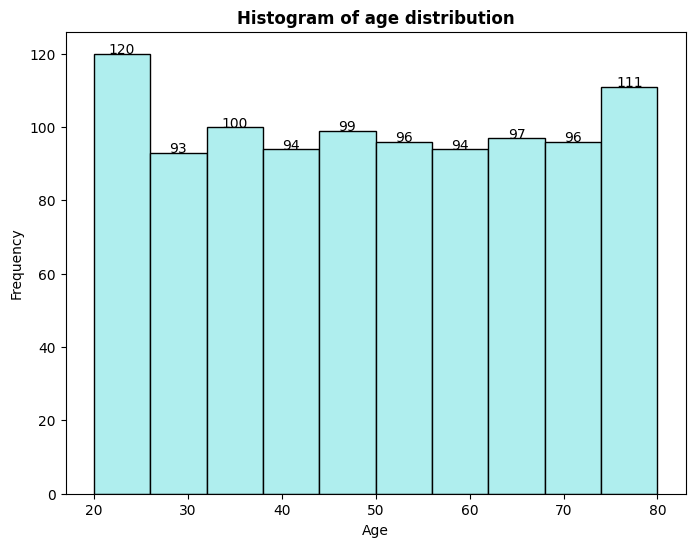

In [7]:
plt.figure(figsize=(8, 6))
hist = plt.hist(data['age'], bins=10, color='paleturquoise', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of age distribution', fontweight='bold')
for i in range(len(hist[0])):
    plt.text(hist[1][i] + 3, hist[0][i], str(int(hist[0][i])), fontsize=10, ha='center')
plt.show()

In [8]:
bins = [0, 12, 18, 35, 60, data['age'].max()]
labels = ['Children', 'Teens', 'Young Adults', 'Adults', 'Elderly']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
age_group_counts = data['age_group'].value_counts()
age_group_counts

Adults          403
Elderly         317
Young Adults    268
Children          0
Teens             0
Name: age_group, dtype: int64

In [9]:
gender_stats = data['gender'].value_counts()
print("\nCount of each gender:\n", gender_stats)


Count of each gender:
 1    765
0    235
Name: gender, dtype: int64


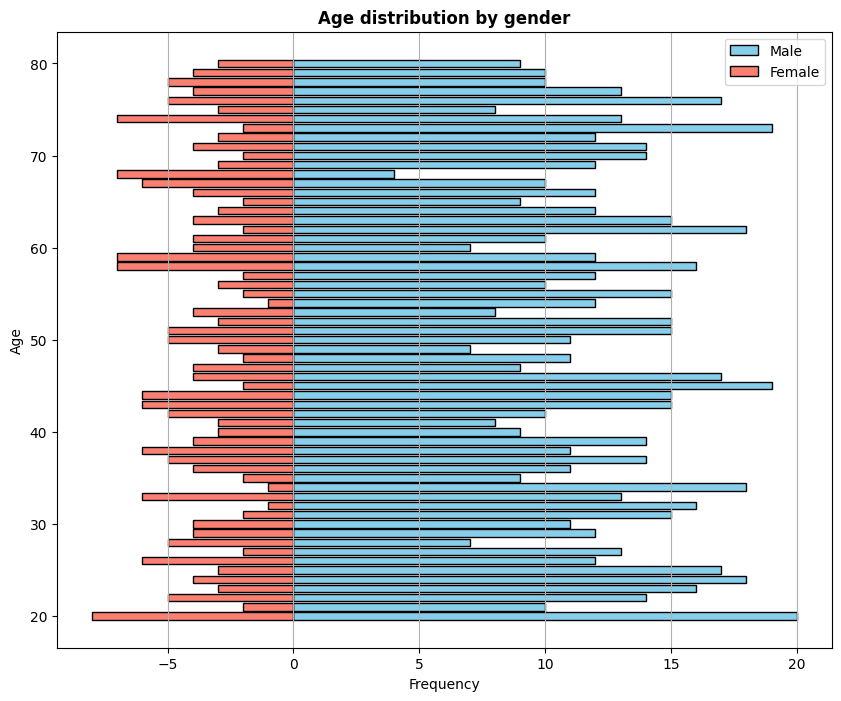

In [10]:
male_data = data[data['gender'] == 1]['age']
female_data = data[data['gender'] == 0]['age']
male_counts = male_data.value_counts().sort_index()
female_counts = female_data.value_counts().sort_index()
age_values = data['age'].unique()
age_values.sort()
plt.figure(figsize=(10, 8))
plt.barh(age_values, male_counts, color='skyblue', edgecolor='black', label='Male')
plt.barh(age_values, -female_counts, color='salmon', edgecolor='black', label='Female')  # Отрицательные значения для женщин, чтобы столбцы были слева
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age distribution by gender', fontweight='bold')
plt.legend()
plt.grid(axis='x')
plt.show()

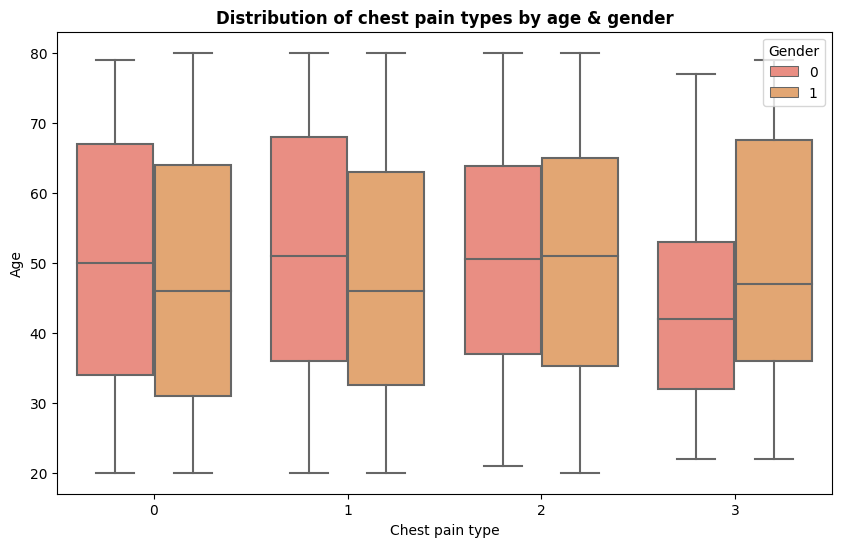

In [11]:
custom_palette = {0: 'salmon', 1: 'sandybrown'}
plt.figure(figsize=(10, 6))
sns.boxplot(x='chestpain', y='age', hue='gender', data=data, palette=custom_palette)
plt.title('Distribution of chest pain types by age & gender', fontweight='bold')
plt.xlabel('Chest pain type')
plt.ylabel('Age')
plt.legend(title='Gender', loc='upper right')
plt.show()

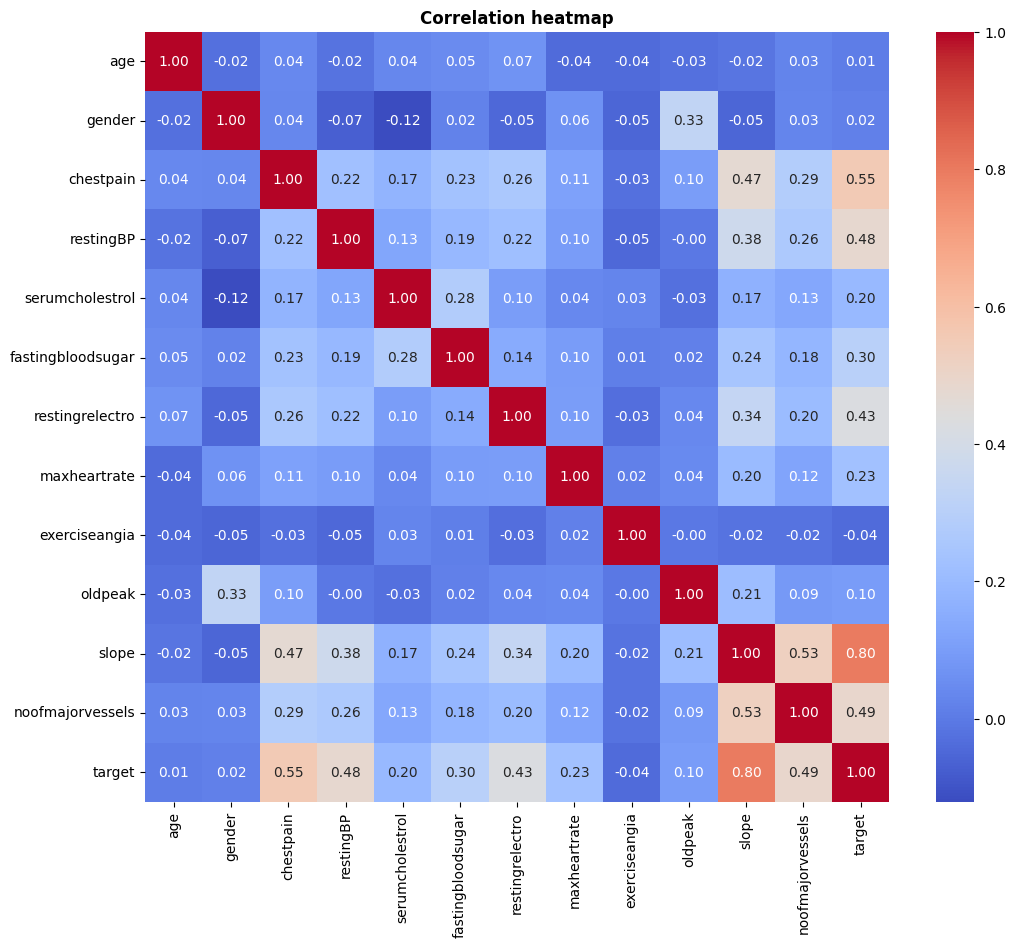

In [12]:
selected_columns = ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
                    'fastingbloodsugar', 'restingrelectro', 'maxheartrate',
                    'exerciseangia', 'oldpeak', 'slope',
                    'noofmajorvessels', 'target']
correlation_matrix = data[selected_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation heatmap', fontweight='bold')
plt.show()

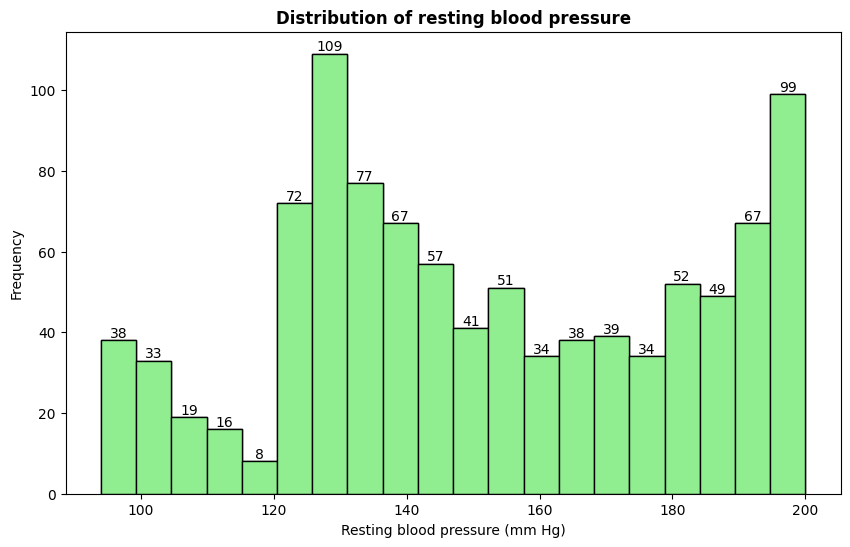

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(data['restingBP'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Resting blood pressure (mm Hg)')
plt.ylabel('Frequency')
plt.title('Distribution of resting blood pressure', fontweight='bold')
counts, bins, _ = plt.hist(data['restingBP'], bins=20, color='lightgreen', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(counts, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')
plt.show()

In [14]:
# perform ANOVA test
chest_pain_0 = data[data['chestpain'] == 0]['restingBP']
chest_pain_1 = data[data['chestpain'] == 1]['restingBP']
chest_pain_2 = data[data['chestpain'] == 2]['restingBP']
chest_pain_3 = data[data['chestpain'] == 3]['restingBP']
f_statistic, p_value = f_oneway(chest_pain_0, chest_pain_1, chest_pain_2, chest_pain_3)
print("F-Statistic:", f_statistic)
print("P-value:", p_value)
if p_value < 0.05:
    print("The differences in resting blood pressure across \nchest pain types are statistically significant.")
else:
    print("There may not be significant differences in resting \nblood pressure across chest pain types.")

F-Statistic: 48.259241977160414
P-value: 4.0100194673457445e-29
The differences in resting blood pressure across 
chest pain types are statistically significant.


In [15]:
predictors = ['age', 'gender', 'chestpain', 'serumcholestrol', 'fastingbloodsugar',
              'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak',
              'slope', 'noofmajorvessels', 'target']
data_subset = data[predictors + ['restingBP']].dropna()
X = data_subset[predictors]
y = data_subset['restingBP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
coefficients = pd.DataFrame({'Predictor': predictors, 'Coefficient': model.coef_})
coefficients

Mean Squared Error: 592.9641649066825
R-squared: 0.3065906143862287


,Predictor,Coefficient
0,age,-0.040017
1,gender,-6.581859
2,chestpain,-1.817218
3,serumcholestrol,0.000560
4,fastingbloodsugar,3.697170
5,restingrelectro,1.685638
6,maxheartrate,-0.011151
7,exerciseangia,-1.183920
8,oldpeak,-0.487999
9,slope,-1.226108


In [16]:
summary_stats = data[['serumcholestrol', 'restingBP']].describe()
summary_stats

,serumcholestrol,restingBP
count,1000.000000,1000.000000
mean,311.447000,151.747000
std,132.443801,29.965228
min,0.000000,94.000000
25%,235.750000,129.000000
50%,318.000000,147.000000
75%,404.250000,181.000000
max,602.000000,200.000000


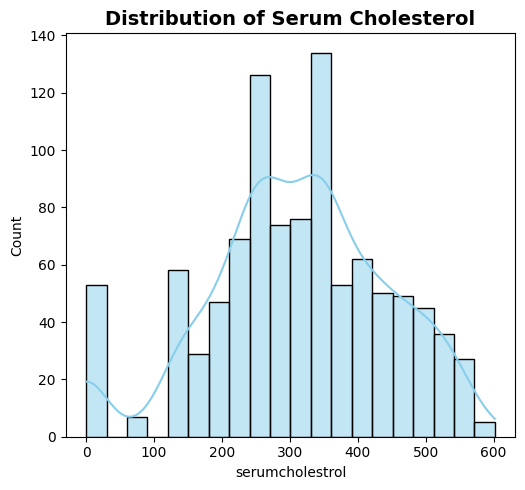

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['serumcholestrol'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Serum Cholesterol', fontweight='bold', fontsize=14)  # Adjusting fontweight and fontsize
plt.tight_layout()
plt.show()

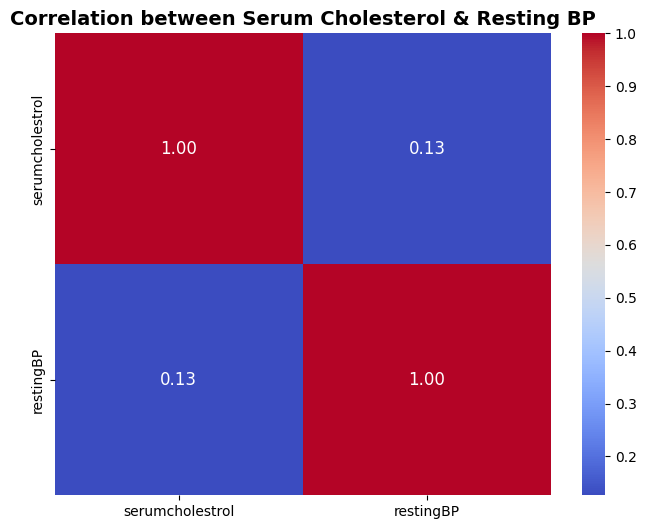

In [18]:
correlation_matrix = data[['serumcholestrol', 'restingBP']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation between Serum Cholesterol & Resting BP', fontweight='bold', fontsize=14, )
plt.show()

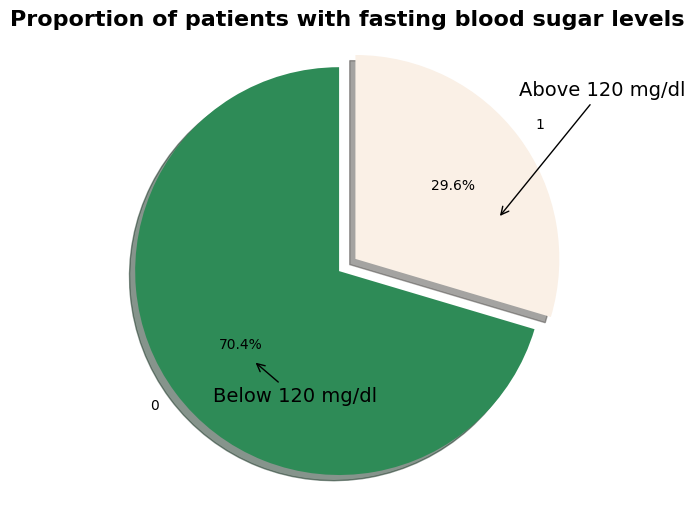

In [19]:
blood_sugar_counts = data['fastingbloodsugar'].value_counts()
colors = ['seagreen', 'linen']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(blood_sugar_counts, labels=blood_sugar_counts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True)
plt.title('Proportion of patients with fasting blood sugar levels', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.annotate('Above 120 mg/dl', xy=(0.7, 0.2), xytext=(0.8, 0.8),
             fontsize=14, color='black',
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Below 120 mg/dl', xy=(-0.5, -0.5), xytext=(-0.7, -0.7),
             fontsize=14, color='black',
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [27]:
df = pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')

In [28]:
df.drop(['patientid'],axis=1,inplace=True)

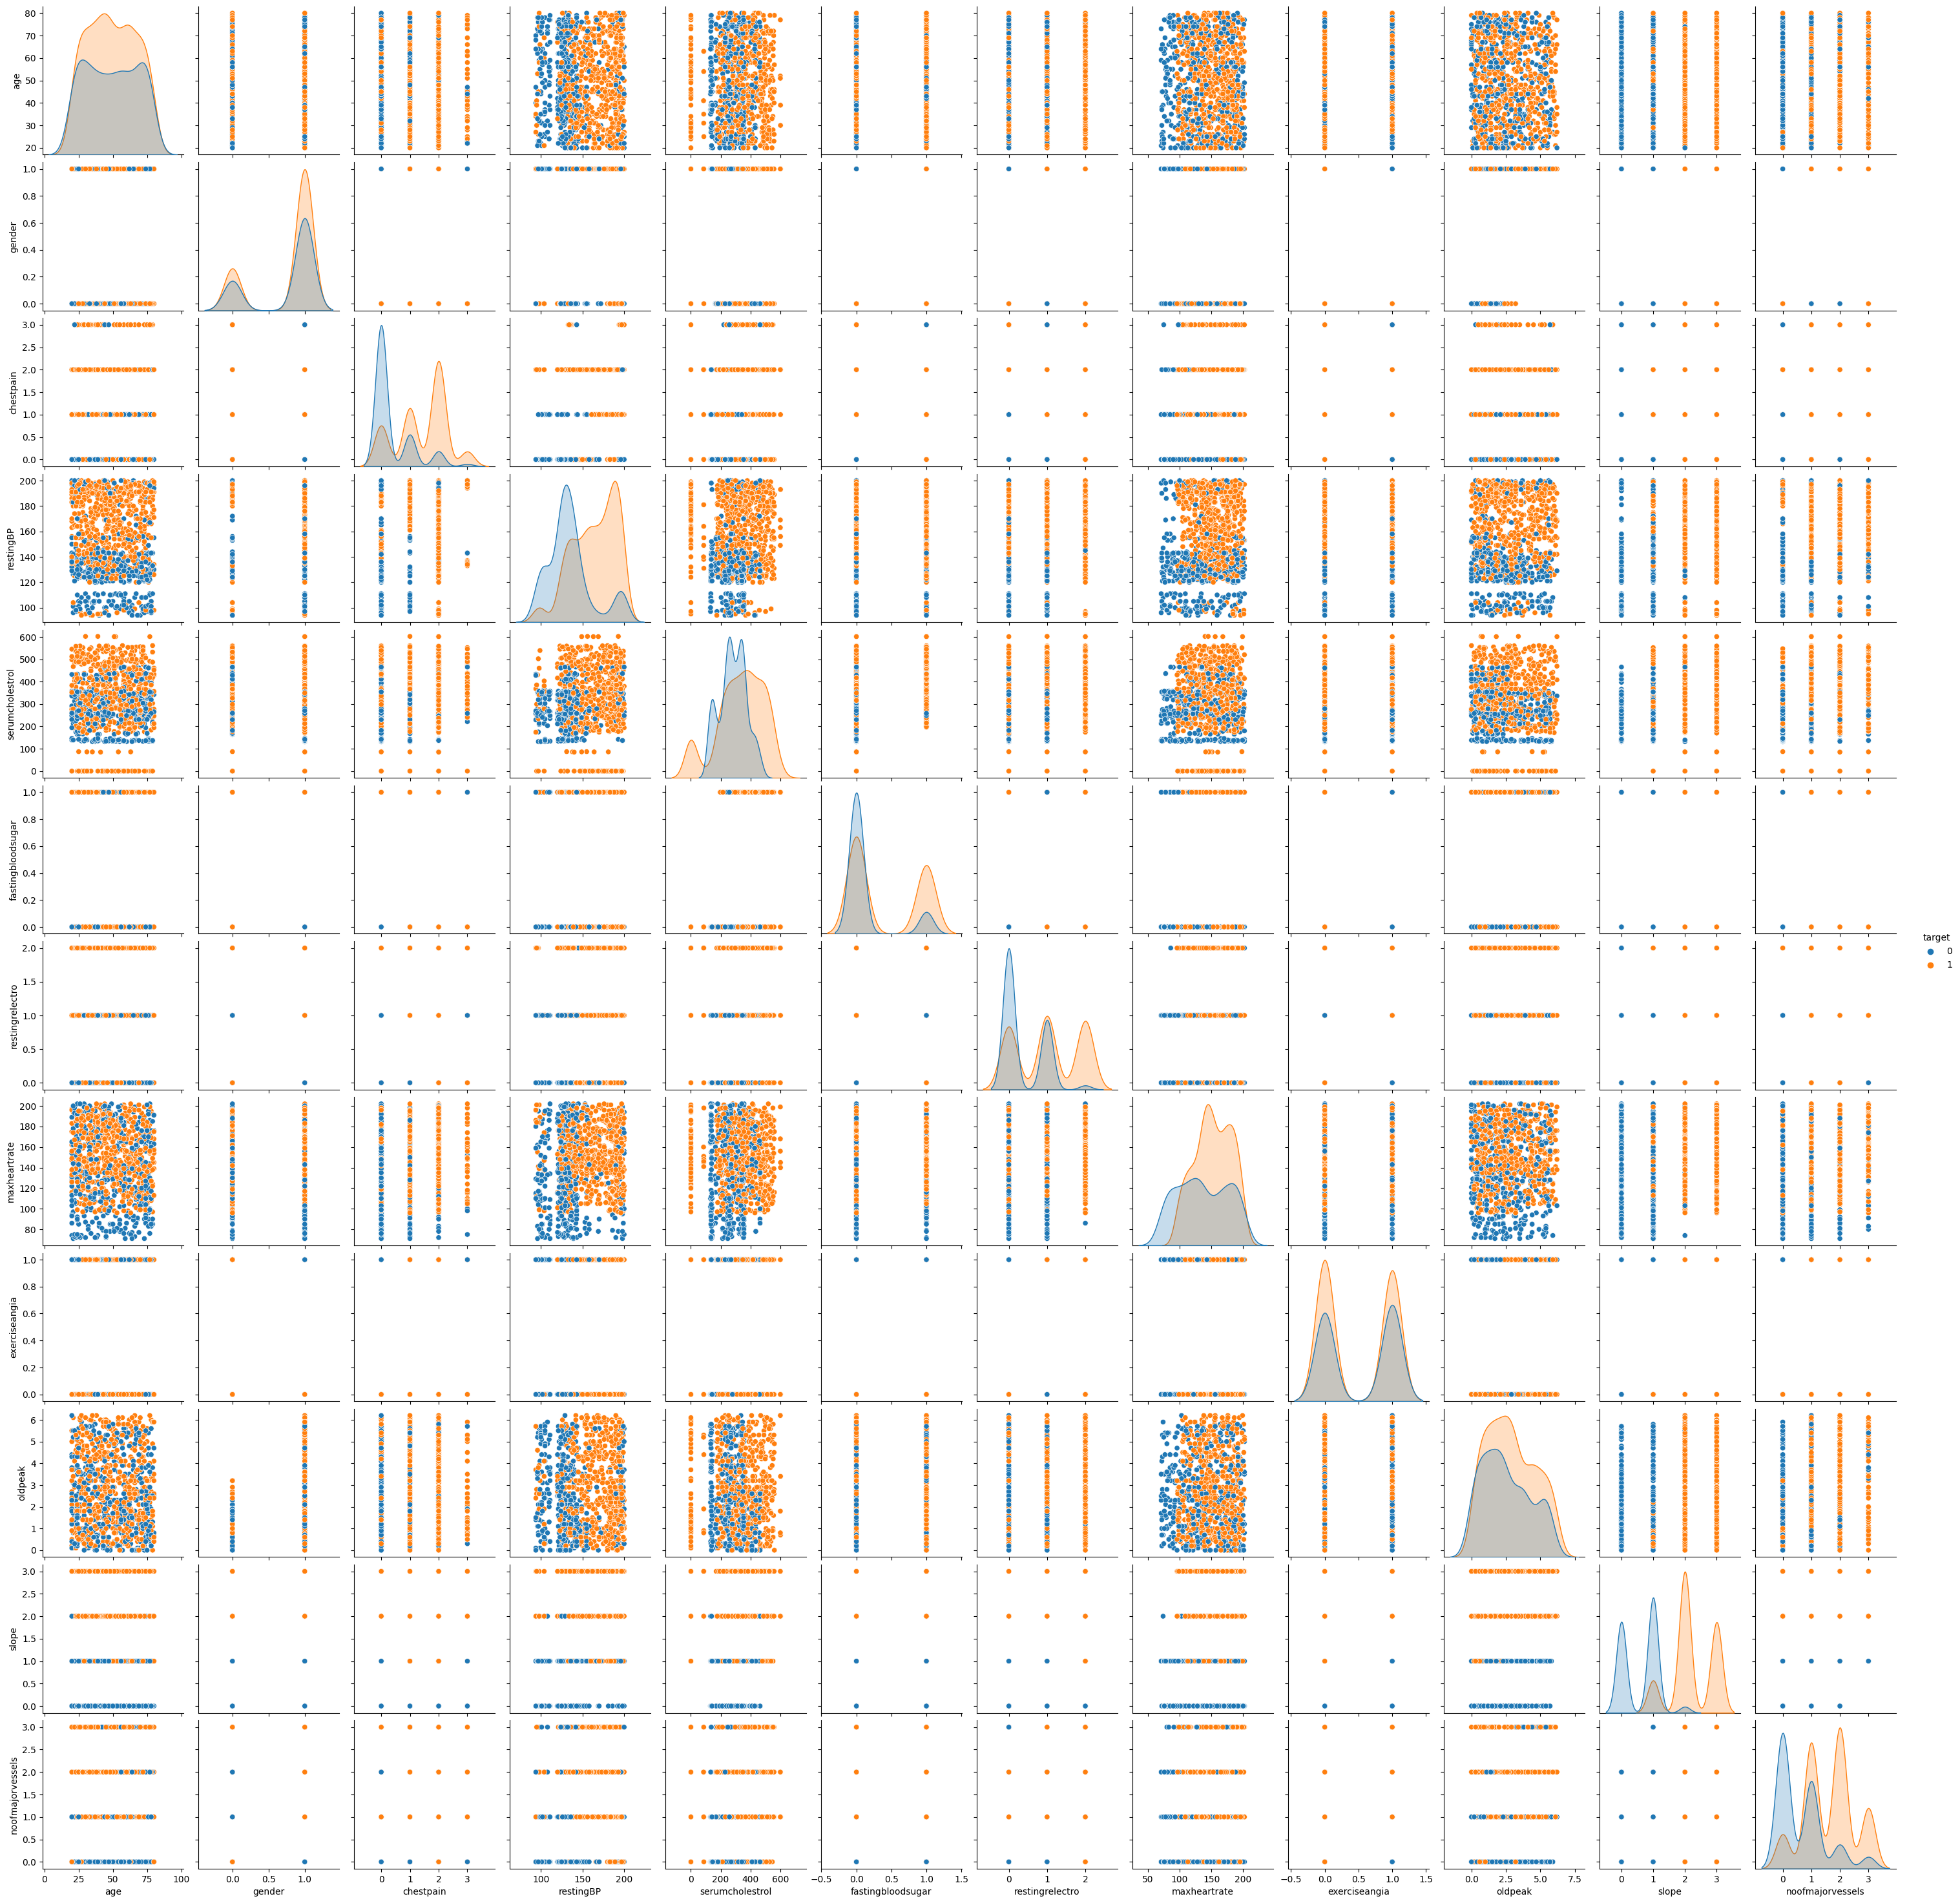

In [29]:
sns.pairplot(data=df, hue='target')

In [30]:
model = xgb.XGBClassifier(random_state=42)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'].values.reshape(-1,1),test_size=0.25,random_state=42)

In [32]:
X_train

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
82,37,1,1,111,345,0,1,195,0,0.0,0,0
991,24,1,0,170,354,0,0,90,1,1.5,0,0
789,24,1,1,170,517,0,2,187,0,0.6,1,2
894,34,1,2,175,511,1,0,190,0,0.3,2,3
398,32,1,2,139,316,0,0,108,1,3.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,70,1,0,155,203,1,1,111,0,4.4,2,3
270,56,0,0,139,221,0,0,123,0,0.8,0,0
860,44,0,3,200,465,0,1,100,0,1.9,1,1
435,64,1,0,198,137,0,1,71,1,2.5,1,0


In [33]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
model.score(X_train, y_train)

1.0

In [37]:
model.score(X_test, y_test)

0.968

In [35]:
y_predicted = model.predict(X_test)

Text(145.72222222222223, 0.5, 'Truth')

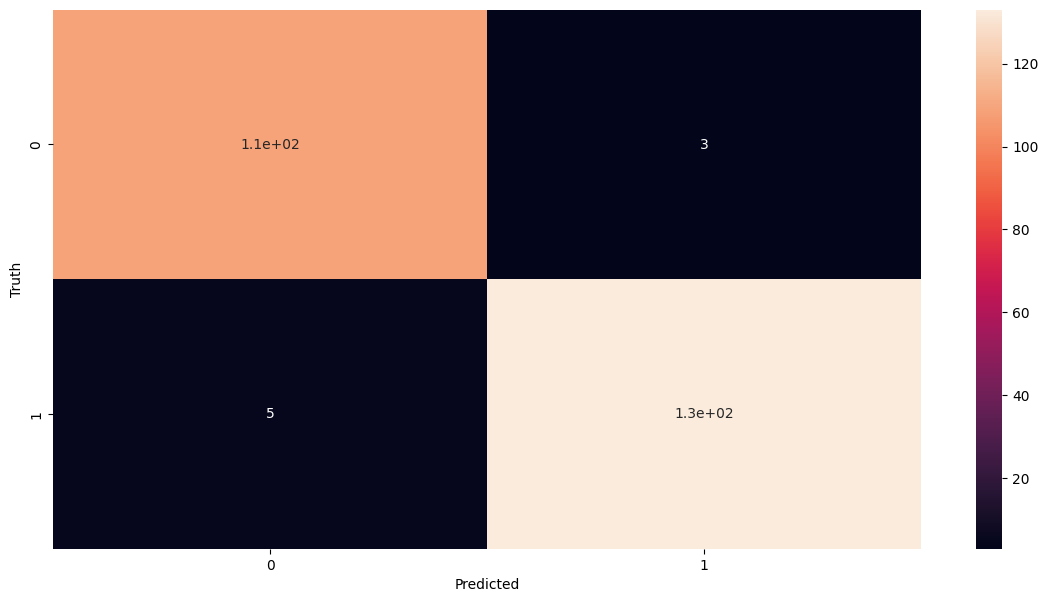

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [40]:
import streamlit as st